In [ ]:
print('Hello')

Hello


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,Name,Monthly Income ($)
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [ ]:
df.describe()

,Monthly Income ($)
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


# Removing Outliers -> using percentile method

In [ ]:
df['Monthly Income ($)'].quantile(0.50)

np.float64(7000.0)

In [ ]:
df['Monthly Income ($)'].quantile(0.75)

np.float64(7750.0)

In [ ]:
df['Monthly Income ($)'].quantile(0.10)

np.float64(4600.0)

In [ ]:
# Having income more than 99 percentile

In [ ]:
percentile_99_income = df['Monthly Income ($)'].quantile(0.99)
percentile_99_income

np.float64(9400479.999999994)

In [ ]:
df[df['Monthly Income ($)']>percentile_99_income]

,Name,Monthly Income ($)
6,Elon Musk,10000000


In [ ]:
df_no_outlier = df[df['Monthly Income ($)']<percentile_99_income]

In [ ]:
df_no_outlier

,Name,Monthly Income ($)
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


In [ ]:
df_no_outlier['price']>df_no_outlier['price'].quantile(0.01)

# Handle Missing Values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,Name,Monthly Income ($)
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [ ]:
df['Monthly Income ($)'].mean()

np.float64(1671666.6666666667)

In [ ]:
df['Monthly Income ($)'].median()

6500.0

In [ ]:
df_new = df.fillna(df['Monthly Income ($)'].median())

In [ ]:
df_new

,Name,Monthly Income ($)
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [ ]:
df.describe()

,Monthly Income ($)
count,6.000000e+00
mean,1.671667e+06
std,4.080034e+06
min,4.000000e+03
25%,5.250000e+03
50%,6.500000e+03
75%,7.750000e+03
max,1.000000e+07


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heights.csv')

In [ ]:
df.head(5)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
df['height'].describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
import seaborn as sns

<Axes: xlabel='height', ylabel='Count'>

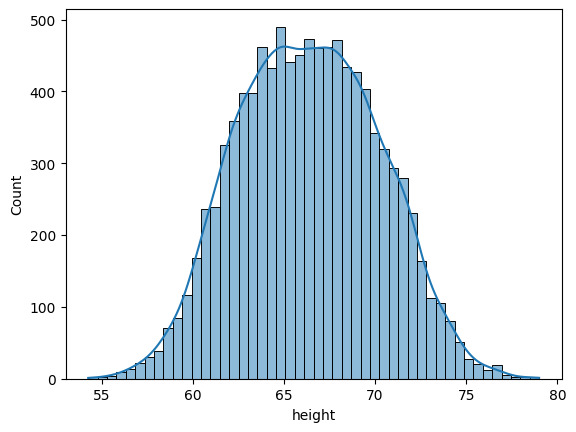

In [ ]:
sns.histplot(df['height'], kde=True)

# Removing Outliers using Standard Deviation

In [ ]:
# Calculate Mean
mean = df['height'].mean()
mean

np.float64(66.367559754866)

In [ ]:
# Std_Deviation
std_deviation = df['height'].std()
std_deviation

3.847528120795573

In [ ]:
# Mean + 3*std
mean + 3*std_deviation

np.float64(77.91014411725271)

In [ ]:
mean - 3*std_deviation

np.float64(54.824975392479274)

In [ ]:
# Outlier People
df[(df['height']>77.91014411725271) | (df['height']<54.824975392479274)] # | -> OR

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
df_no_outlier = df[(df['height']<77.91014411725271) & (df['height']>54.824975392479274)] # & -> and
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df_no_outlier['height'].describe()

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


In [ ]:
df_no_outlier = df[(df['height']<(mean+2*std_deviation)) & (df['height']>(mean-2*std_deviation))] # & -> and
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df_no_outlier['height'].describe()

,height
count,9652.000000
mean,66.345445
std,3.537247
min,58.680665
25%,63.610410
50%,66.309262
75%,69.062059
max,74.056427


<Axes: xlabel='height', ylabel='Count'>

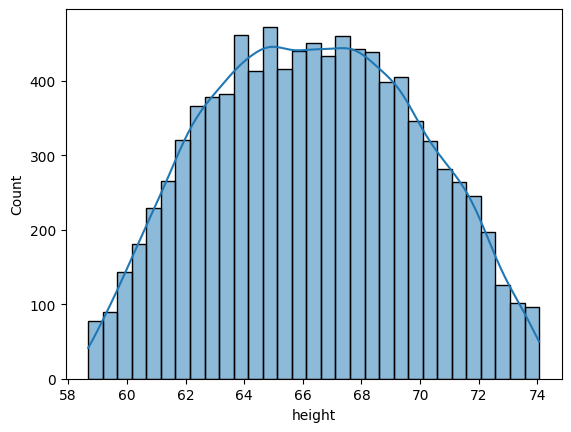

In [ ]:
sns.histplot(df_no_outlier['height'], kde=True)

In [ ]:
# You need to examine price_per_sqft column and do following
# (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

# On step(1) dataframe, use 4 standard deviation to remove outliers
# Plot graph for new dataframe that is generated


In [ ]:
10**(2.0934216852)

124.00000001078267

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(0)
income = np.random.exponential(scale=50000, size=100).astype(int)

In [ ]:
income

array([ 39793,  62796,  46161,  39360,  27552,  51907,  28775, 111176,
       165745,  24180,  78444,  37633,  41971, 129912,   3684,   4558,
         1021,  89374,  75289, 102015, 192261,  80261,  30946,  75826,
         6293,  51071,   7736, 144721,  36891,  26778,  15364,  74412,
        30454,  42016,    948,  48069,  47349,  47977, 143895,  57256,
        22275,  28726,  59805,   3105,  54945,  55529,  11810,   6901,
        18948,  22605,  42221,  28866, 222724,   5381,  11715,   8795,
        52937,  14604,  31397,  14013,   8656,   5847,  53403,   7435,
        10944,  23000,  86016,   5107,  90990,   5051, 187451,  31616,
       188096,  46423,  67212,   1998,  16620,   6402,  17558,   6319,
        19135,  26744,   3314,  58959,  41804,  15420,  37037,   4932,
        42894, 132462,  19178,  55042,   7066,  62996,  17082,  10117,
        44156,   1015,  88287,    235])

In [ ]:
df_exp = pd.DataFrame({
    'ID': range(1,101),
    'Income' : income
})

In [ ]:
df_exp

,ID,Income
0,1,58431
1,2,6574
2,3,1584
3,4,1993
4,5,4924
...,...,...
95,96,115749
96,97,35305
97,98,14188
98,99,27688


<Axes: xlabel='Income', ylabel='Count'>

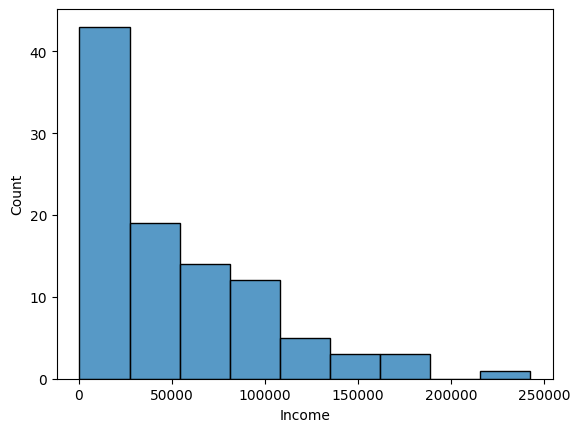

In [ ]:
import seaborn as sns
sns.histplot(df_exp['Income'])

In [ ]:
df_exp['log_income'] = np.log(df_exp['Income'])

In [ ]:
df_exp

,ID,Income,log_income
0,1,58431,10.975602
1,2,6574,8.790878
2,3,1584,7.367709
3,4,1993,7.597396
4,5,4924,8.501876
...,...,...,...
95,96,115749,11.659179
96,97,35305,10.471780
97,98,14188,9.560152
98,99,27688,10.228754


<Axes: xlabel='log_income', ylabel='Count'>

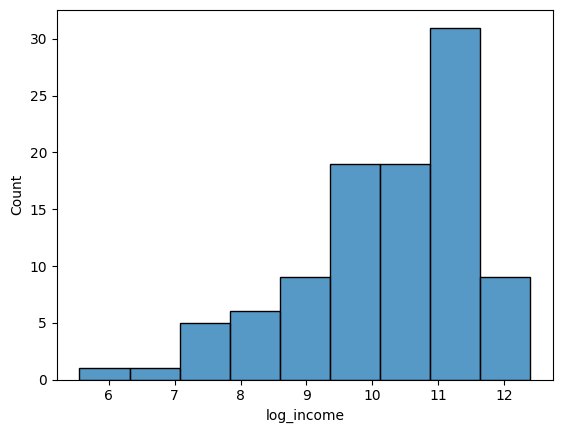

In [ ]:
sns.histplot(df_exp['log_income'])

# Linear Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('homeprices.csv') #Df -> Dataframe -> Table which contains your data

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price')

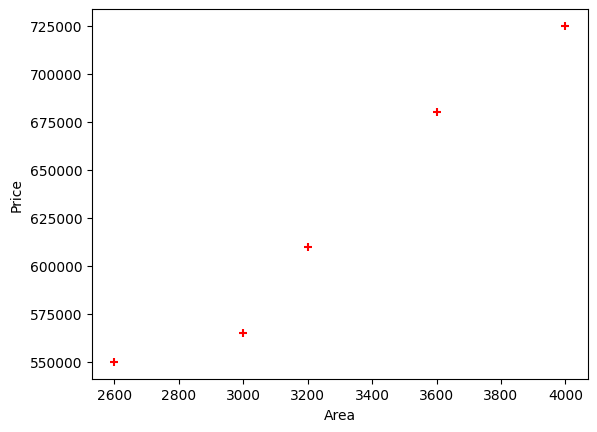

In [ ]:
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.xlabel('Area')
plt.ylabel('Price')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
line = LinearRegression()
line.fit(df[['area']], df['price'])

LinearRegression()

In [ ]:
# m -> coefficient
line.coef_

array([135.78767123])

In [ ]:
# c -> intercept
line.intercept_

np.float64(180616.43835616432)

In [ ]:
# Predictions
#Predicted_price = m* Area + c
135.78767123*5000 + 180616.43835616432

859554.7945061643

In [ ]:
line.predict([[5000]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

Text(0, 0.5, 'Price')

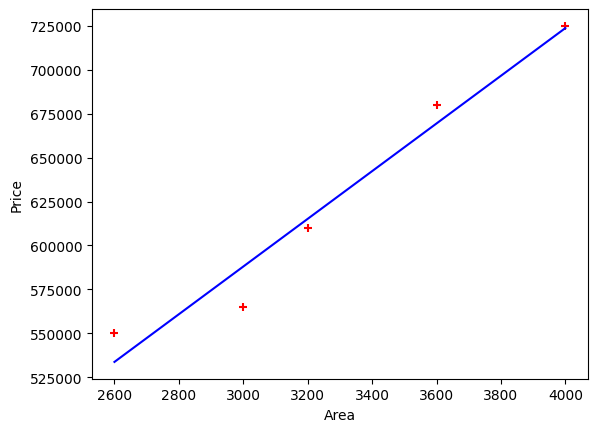

In [ ]:
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.plot(df['area'], line.predict(df[['area']]), color='blue')
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

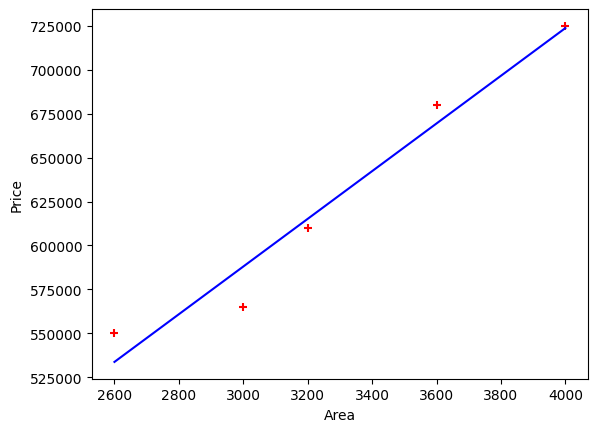

In [ ]:
# What will be the predicted income in 2025
plt.scatter(df['area'],df['price'],marker='+',color='red',label='Actual data pts')
plt.plot(df['area'],line.predict(df[['area']]),color='blue')
plt.xlabel('Area')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

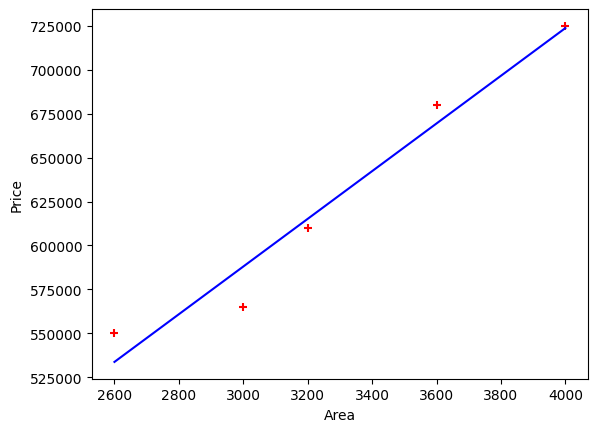

In [ ]:
plt.scatter(df['area'],df['price'],marker='+',color='red',label='Actual data pts')
plt.plot(df['area'],line.predict(df[['area']]),color='blue')
plt.xlabel('Area')
plt.ylabel('Price')

# Multivariate Regression


In [ ]:
df = pd.read_csv('homeprices_multi.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df['bedrooms'].median()

4.0

In [ ]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
line = LinearRegression()
line.fit(df[['area', 'bedrooms', 'age']], df['price'])

LinearRegression()

In [ ]:
line.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
line.intercept_

np.float64(221323.00186540402)

In [ ]:
line.predict([[3000, 3, 15]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([579201.19929613])

# Polynomial Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('plant.csv')

In [ ]:
df

,Pesticide_Amount_mg_per_ha,Plant_Production
0,0,10
1,50,15
2,100,18
3,150,20
4,200,21
5,250,20
6,300,18
7,350,15
8,400,10
9,450,4


Text(0, 0.5, 'Plant Production')

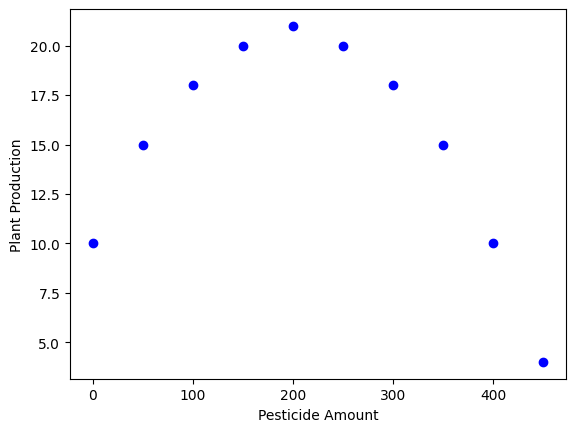

In [ ]:
plt.scatter(df['Pesticide_Amount_mg_per_ha'], df['Plant_Production'], color='blue')
plt.xlabel('Pesticide Amount')
plt.ylabel('Plant Production')

In [ ]:
from sklearn.linear_model import LinearRegression
line = LinearRegression()
line.fit(df[['Pesticide_Amount_mg_per_ha']], df['Plant_Production'])

LinearRegression()

Text(0, 0.5, 'Plant_Production')

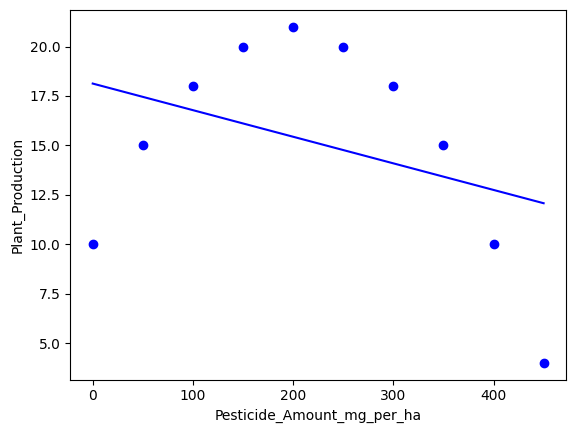

In [ ]:
plt.scatter(df['Pesticide_Amount_mg_per_ha'], df['Plant_Production'], color='blue')
plt.plot(df['Pesticide_Amount_mg_per_ha'],line.predict(df[['Pesticide_Amount_mg_per_ha']]),color='blue')
plt.xlabel('Pesticide_Amount_mg_per_ha')
plt.ylabel('Plant_Production')

In [ ]:
# Parabola
# y = ax^2 + bx + c
# Plant Production = a*(Pesticide)^2 + b*(Pesticide) + c

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
squaringFunction = PolynomialFeatures(degree=2)

In [ ]:
Pesticide_square = squaringFunction.fit_transform(df[['Pesticide_Amount_mg_per_ha']])

In [ ]:
Pesticide_square
#a*(Pesticide)^2 + b*(Pesticide) + c * (1)

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 3.500e+02, 1.225e+05],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 4.500e+02, 2.025e+05]])

In [ ]:
parabola = LinearRegression()
parabola.fit(Pesticide_square, df['Plant_Production'])

LinearRegression()

Text(0, 0.5, 'Plant_Production')

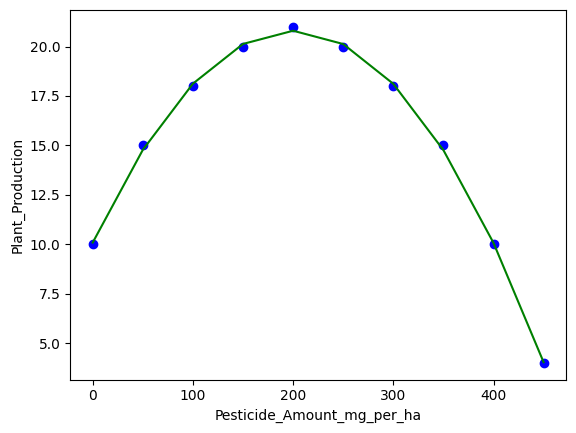

In [ ]:
plt.scatter(df['Pesticide_Amount_mg_per_ha'], df['Plant_Production'], color='blue')
plt.plot(df['Pesticide_Amount_mg_per_ha'],parabola.predict(Pesticide_square),color='green')
plt.xlabel('Pesticide_Amount_mg_per_ha')
plt.ylabel('Plant_Production')

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('student_exam_simple.csv')
df

,Hours_Studied,Passed_Exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [ ]:
model = LogisticRegression()
model.fit(df[['Hours_Studied']], df['Passed_Exam'])

LogisticRegression()

In [ ]:
model.predict([[4.45]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.predict_proba([[4.45]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.51286581, 0.48713419]])

In [ ]:
import numpy as np

In [ ]:
X = np.linspace(0, 22, 300).reshape(-1,1)

In [ ]:
y_pred = model.predict_proba(X)[:,1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Pass or Fail')

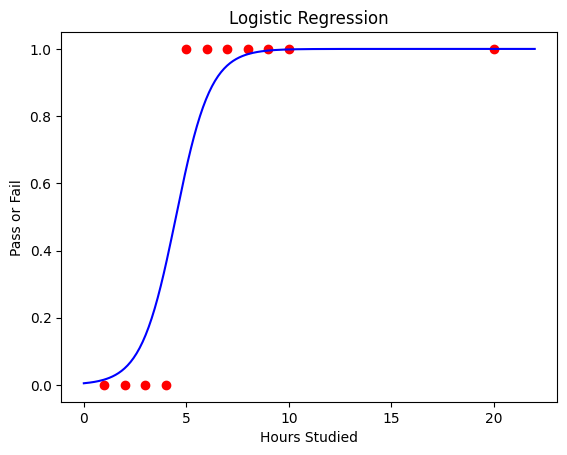

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Hours_Studied'], df['Passed_Exam'], color='red')
plt.plot(X, y_pred, color='blue')
plt.title('Logistic Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Pass or Fail')

#Titanic Survival Predictor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

/tmp/ipython-input-2081857410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


([<matplotlib.axis.XTick at 0x7b5e71f98920>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

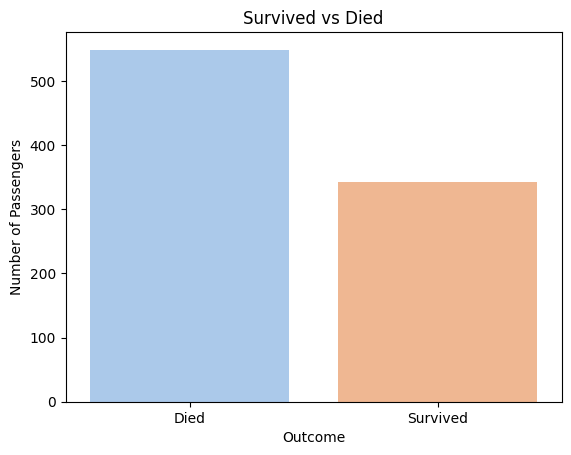

In [ ]:
# How many survived vs how many died
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title('Survived vs Died')
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Died', 'Survived'])
# plt.grid(True)

In [ ]:
# Gender wise survival
male_data = df[df['Sex']=='male']
male_died = len(male_data[male_data['Survived']==0])
male_survived = len(male_data[male_data['Survived']==1])

In [ ]:
female_data = df[df['Sex']=='female']
female_died = len(female_data[female_data['Survived']==0])
female_survived = len(female_data[female_data['Survived']==1])

Text(0, 0.5, 'Number of Males')

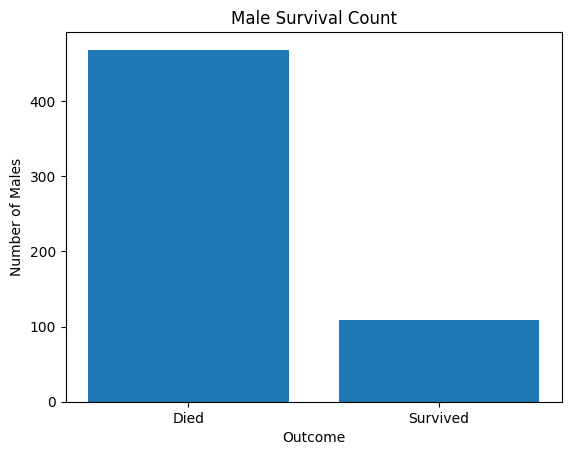

In [ ]:
plt.bar(['Died', 'Survived'], [male_died, male_survived])
plt.title('Male Survival Count')
plt.xlabel('Outcome')
plt.ylabel('Number of Males')

Text(0, 0.5, 'Number of Females')

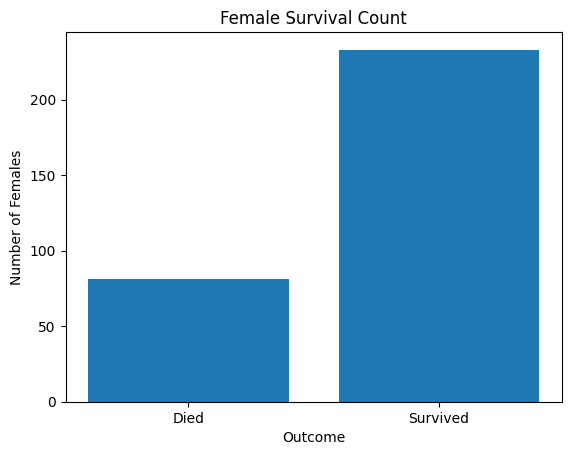

In [ ]:
plt.bar(['Died', 'Survived'], [female_died, female_survived])
plt.title('Female Survival Count')
plt.xlabel('Outcome')
plt.ylabel('Number of Females')

In [ ]:
len(male_data)

577

In [ ]:
len(female_data)

314

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.drop(columns=['PassengerId', 'Ticket', 'Name', 'Embarked', 'Cabin'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [ ]:
df

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,True
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,False
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,False
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,True


In [ ]:
# Divide into input and output
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,True
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,False
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,False
889,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,True


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
model.coef_

array([[-1.05148475, -0.0385151 , -0.33684089, -0.09597312,  0.00301133,
        -2.65040703]])

In [ ]:
# Feature importance
df_impt = pd.DataFrame({'Feature':X.columns, 'Coefficients':model.coef_[0]}).sort_values(by='Coefficients')
df_impt

,Feature,Coefficients
5,Sex_male,-2.650407
0,Pclass,-1.051485
2,SibSp,-0.336841
3,Parch,-0.095973
1,Age,-0.038515
4,Fare,0.003011


/tmp/ipython-input-3392699032.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficients', y='Feature', data=df_impt, palette='coolwarm')


Text(0.5, 1.0, 'Feature Importance')

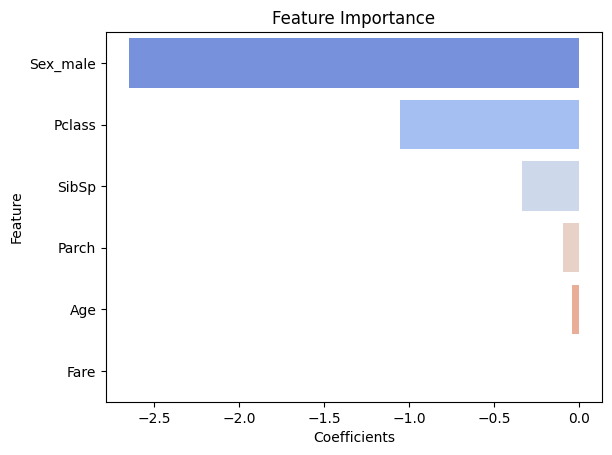

In [ ]:
sns.barplot(x='Coefficients', y='Feature', data=df_impt, palette='coolwarm')
plt.title('Feature Importance')
